In [4]:
import os
import functools

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib tk
from matplotlib import cm
import seaborn as sns

from tests.metaworld.envs.mujoco.sawyer_xyz.utils import trajectory_summary
from tests.metaworld.envs.mujoco.sawyer_xyz.test_scripted_policies import ALL_ENVS, test_cases_latest_nonoise

sns.set()

In [5]:
def sample_trajectories_from(env, policy, act_noise_pct, iters=100):
    sampled_rewards = []
    sampled_returns = []
    sampled_first_successes = []

    for _ in range(iters):
        s = trajectory_summary(env, policy, act_noise_pct, end_on_success=False)
        sampled_rewards.append(s[1])
        sampled_returns.append(s[2])
        sampled_first_successes.append(s[3])

    sampled_rewards = np.vstack(sampled_rewards)
    sampled_returns = np.vstack(sampled_returns)
    sampled_first_successes = np.array(sampled_first_successes)

    return sampled_rewards, sampled_returns, sampled_first_successes


def plot(rewards, returns, tag, dim):
    x = np.linspace(0, 1, rewards.shape[0])
    y = np.arange(rewards.shape[1])
    X, Y = np.meshgrid(x, y)
    
    fig = plt.figure(figsize=(12, 5))

    Z = rewards.T
    norm = plt.Normalize(Z.min(), Z.max())
    colors = cm.viridis(norm(Z))
    rcount, ccount, _ = colors.shape

    ax0 = fig.add_subplot(121, projection='3d')
    surf = ax0.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)

    surf.set_facecolor((0,0,0,0))
    ax0.set_xlabel(f'Noise Percent in Action Dim {dim}')
    ax0.set_ylabel('Time Steps')
    ax0.set_zlabel('Rewards')
    ax0.set_zscale('symlog')

    Z = returns.T
    norm = plt.Normalize(Z.min(), Z.max())
    colors = cm.viridis(norm(Z))
    rcount, ccount, _ = colors.shape

    ax1 = fig.add_subplot(122, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)

    surf.set_facecolor((0,0,0,0))
    ax1.set_xlabel(f'Noise Percent in Action Dim {dim}')
    ax1.set_ylabel('Time Steps')
    ax1.set_zlabel('Returns')
    ax1.set_zscale('symlog')

    plt.subplots_adjust(top=.85)
    fig.suptitle(f'{tag}')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    ax0.view_init(30, +32)
    ax1.view_init(30, -45)
    plt.show()
    if not os.path.exists('figures'):
        os.mkdir('figures')
    fig.savefig(f'figures/{tag}_vary_noise_rewards_returns.jpg')

/home/metaworld-user/.local/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float64
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/metaworld-user/.local/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/workspaces/Metaworld/metaworld/policies/policy.py:41: UserWarning: Constant(s) may be too high. Environments clip response to [-1, 1]
  warnings.warn('Constant(s) may be too high. Environments clip response to [-1, 1]')


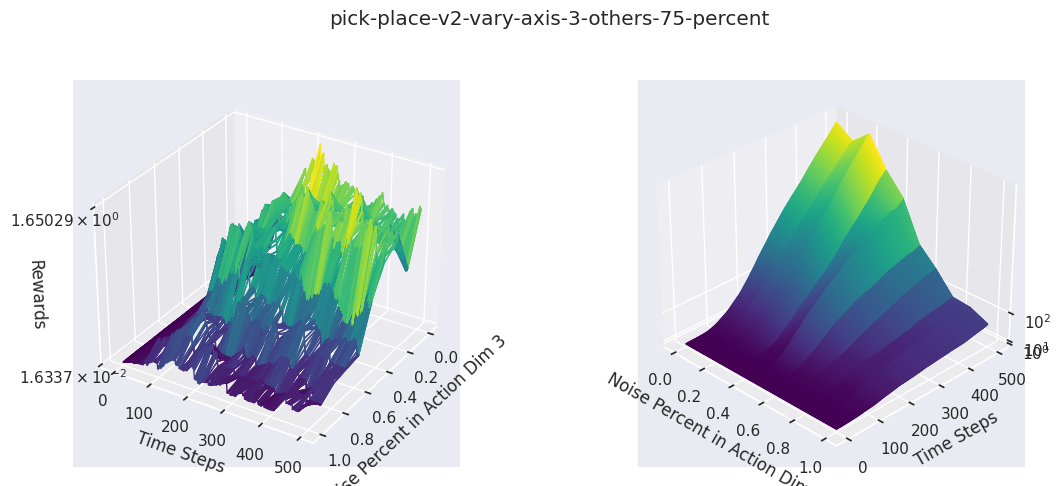

In [6]:
config = [
#     ['button-press-topdown-v1', 3],
    ['pick-place-v2', 3],
#     ['reach-v2', 3],
#     ['window-open-v2', 3],
#     ['sweep-v1', 3],
#     ['sweep-into-v1', 3],
#     ['shelf-place-v2', 3],
#     ['push-v2', 3],
#     ['peg-insert-side-v2', 3],
#     ['lever-pull-v2', 3],
]

for env, axis in config:
    tag = env + '-vary-axis-' + str(axis)
    policy = functools.reduce(lambda a,b : a if a[0] == env else b, test_cases_latest_nonoise)[1]
    env = ALL_ENVS[env]()
    env._partially_observable = False
    env._freeze_rand_vec = False
    env._set_task_called = True

    sampled_rewards, sampled_returns = [], []
    noise = np.full(4, .75)
    tag = tag + '-others-75-percent'

    for i in np.linspace(0, 1, 10):
        noise[axis] = i

        rew, ret, _ = sample_trajectories_from(env, policy, noise)
        sampled_rewards.append(rew.mean(axis=0))
        sampled_returns.append(ret.mean(axis=0))

    sampled_rewards = np.vstack(sampled_rewards)
    sampled_returns = np.vstack(sampled_returns)

    plot(sampled_rewards, sampled_returns, tag, axis)

In [7]:
import metaworld
import random

print(metaworld.ML1.ENV_NAMES)  # Check out the available environments

ml1 = metaworld.ML1('window-open-v2') # Construct the benchmark, sampling tasks

env = ml1.train_classes['window-open-v2']()  # Create an environment with task `pick_place`
task = random.choice(ml1.train_tasks)
env.set_task(task)  # Set task

obs = env.reset()  # Reset environment
a = env.action_space.sample()  # Sample an action
obs, reward, done, info = env.step(a)  # Step the environoment with the sampled random action


['assembly-v2', 'basketball-v2', 'bin-picking-v2', 'box-close-v2', 'button-press-topdown-v2', 'button-press-topdown-wall-v2', 'button-press-v2', 'button-press-wall-v2', 'coffee-button-v2', 'coffee-pull-v2', 'coffee-push-v2', 'dial-turn-v2', 'disassemble-v2', 'door-close-v2', 'door-lock-v2', 'door-open-v2', 'door-unlock-v2', 'hand-insert-v2', 'drawer-close-v2', 'drawer-open-v2', 'faucet-open-v2', 'faucet-close-v2', 'hammer-v2', 'handle-press-side-v2', 'handle-press-v2', 'handle-pull-side-v2', 'handle-pull-v2', 'lever-pull-v2', 'peg-insert-side-v2', 'pick-place-wall-v2', 'pick-out-of-hole-v2', 'reach-v2', 'push-back-v2', 'push-v2', 'pick-place-v2', 'plate-slide-v2', 'plate-slide-side-v2', 'plate-slide-back-v2', 'plate-slide-back-side-v2', 'peg-unplug-side-v2', 'soccer-v2', 'stick-push-v2', 'stick-pull-v2', 'push-wall-v2', 'reach-wall-v2', 'shelf-place-v2', 'sweep-into-v2', 'sweep-v2', 'window-open-v2', 'window-close-v2']


/home/metaworld-user/.local/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float64
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/metaworld-user/.local/lib/python3.8/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [8]:
obs

array([ 5.06910663e-03,  6.00361585e-01,  1.93502037e-01,  1.00000000e+00,
        3.39084505e-02,  6.28413722e-01,  1.99162090e-02, -3.20588332e-04,
        3.13468020e-04, -1.43564471e-08,  9.99999899e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.15235164e-03,  6.00189803e-01,
        1.94301175e-01,  1.00000000e+00,  3.38964619e-02,  6.28401487e-01,
        1.99999996e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])